### <b>실전 프로젝트 - 기본적인 기계학습 알고리즘을 활용한 풍경(Scene) 이미지 분류</b>

* 한 장의 풍경 이미지가 주어졌을 때, 어떠한 카테고리(category)에 속하는지 맞추는 <b>분류 모델</b>을 만드세요.
* 다음의 두 가지 기본적인 기계학습 알고리즘을 실습합니다.
    1. 선형 분류 모델(Linear Models for Classification)
    2. KNN (K-Nearest Neighbors)
* 본 프로젝트는 <b>총 9개의 문제</b>로 구성됩니다.
    * <b>Problem</b>이라고 명시된 부분의 소스코드만 작성합니다.
    * <b>알아보기</b>라고 명시된 부분은 단순히 읽고 실행하면 됩니다.
    * 단계적으로 문제를 풀어나가는 과정에서 분류 모델을 학습하는 기본적인 방법을 이해할 수 있습니다.

#### <b>Problem 1. 데이터셋 다운로드 및 분석하기</b>

* [Scene Classification 데이터셋 저장소](https://github.com/ndb796/Scene-Classification-Dataset)
    * 참고: [원본 Kaggle 데이터셋 링크](https://www.kaggle.com/nitishabharathi/scene-classification)
    * 본 데이터셋은 <b>저작권이 없는(No Copyright)</b> [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) 라이센스를 따라므로, 자유롭게 변형할 수 있습니다.
* 다음의 명령어를 이용해 데이터셋을 다운로드할 수 있습니다.

<pre>
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset
</pre>

In [1]:
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset

fatal: destination path 'Scene-Classification-Dataset' already exists and is not an empty directory.
/content/Scene-Classification-Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### <b>(알아보기) 데이터셋 설명</b>

* 장면(scene) 데이터셋은 24,335개의 다양한 자연 경치(scene) 이미지로 구성되어 있습니다.
* 총 6개의 클래스(class)로 구성됩니다.

<pre>
0. 빌딩(buildings)
1. 숲(forests)
2. 빙하(glacier)
3. 산(mountains)
4. 바다(sea)
5. 거리(street)
</pre>

* 각 이미지는 150 X 150 크기를 가집니다.
* 데이터셋 폴더 구성은 다음과 같습니다.

<pre>
Dataset/
    train-scene classification/
        train/ # 전체 이미지가 담긴 폴더입니다.
            0.jpg
            1.jpg
            2.jpg
            ...
            24333.jpg
            24334.jpg
        train.csv # 학습 이미지마다 클래스(class) 정보가 포함되어 있습니다.
    test_WyRytb0.csv # 최종 테스트(test) 이미지의 번호를 포함하며, 본 실습에서 사용하지 않습니다.
</pre>

#### <b>(알아보기) 학습 이미지 확인 방법</b>

* 학습할 데이터셋을 확인합니다.
* os 라이브러리의 os.listdir()를 이용하여 이미지 폴더에 존재하는 파일 이름을 확인합니다.
* pandas 라이브러리의 read_csv()를 이용하여 train.csv 파일을 읽습니다.
    * 참고: [pandas의 기본 사용법](https://www.youtube.com/watch?v=9PF4BAFh-J8)

In [3]:
import os
import pandas as pd


path = 'train-scene classification/'

# 전체 이미지 개수 출력하기
file_list = os.listdir(path + 'train/')
print('전체 이미지의 개수:', len(file_list))

# 학습 이미지 확인하기
dataset = pd.read_csv(path + 'train.csv')
print('학습 이미지의 개수:', len(dataset))
print('학습 이미지별 클래스 정보')
dataset.head()

전체 이미지의 개수: 24335
학습 이미지의 개수: 17034
학습 이미지별 클래스 정보


,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


#### <b>Problem 2. 클래스별 학습 이미지 개수 출력하기</b>

* 클래스별 학습 이미지의 개수를 구하세요.
    * pandas 라이브러리의 데이터프레임(DataFrame)을 이용하면 매우 간단한 코드로 구현할 수 있습니다.
    * 예를 들어 label 컬럼(column)의 값이 3인 데이터의 개수는 다음과 같이 확인 가능합니다.
    * 참고: [pandas의 활용](https://www.youtube.com/watch?v=5ZiP4HRFBqU)

<pre>
my_frame[my_frame.label == 3]
</pre>

* 총 학습 이미지의 수는 17034개, 클래스의 개수는 6개입니다.
* <b>클래스 0</b>: {2628}
* <b>클래스 1</b>: {2745}
* <b>클래스 2</b>: {2957}
* <b>클래스 3</b>: {3037}
* <b>클래스 4</b>: {2784}
* <b>클래스 5</b>: {2883}

In [4]:
dataset.groupby(dataset.label).count()

,image_name
label,
0,2628
1,2745
2,2957
3,3037
4,2784
5,2883


#### <b>(알아보기) 특정한 이미지를 불러와 화면에 출력하기</b>

* PIL 라이브러리로 특정한 경로의 이미지를 불러와 numpy 객체로 만들 수 있습니다.

<pre>
img = np.asarray(Image.open(이미지 경로))
</pre>

* Numpy 객체는 matplotlib를 이용해 간단히 시각화할 수 있습니다.

<pre>
plt.imshow(img)
plt.show()
</pre>

* 원본 이미지의 크기가 너무 크므로, 모든 이미지를 64 X 64 X 3의 크기로 변경합니다.

In [5]:
import matplotlib.pyplot as plt

이미지의 해상도: (64, 64, 3)


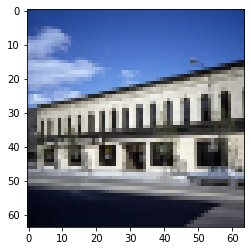

In [6]:
from skimage.transform import resize
from PIL import Image
import numpy as np


img = Image.open(path + 'train/' + file_list[0])
img = np.asarray(img)
img = resize(img, (64, 64, 3))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img)
plt.show()

#### <b>(알아보기) 학습/검증 데이터셋 나누는 방법</b>

* sklearn 라이브러리의 train_test_split()을 이용해 학습/검증 데이터셋을 구분합니다.
* 학습 이미지 데이터를 8:2의 비율로 학습(training)과 검증(validation) 데이터로 구분합니다.
* train_test_split() 함수의 주요 파라미터는 다음과 같습니다.
    * <b>test_size</b>: 테스트 데이터셋의 비율(default = 0.25)
    * <b>train_size</b>: 학습 데이터셋의 비율(default = 1 - test_size)
    * <b>shuffle</b>: 데이터를 분할할 때 자동으로 데이터 섞기(shuffle)를 수행합니다.

In [7]:
from sklearn.model_selection import train_test_split


train_dataset, val_dataset = train_test_split(dataset, test_size=0.2)

print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(val_dataset))

학습 데이터셋 크기: 13627
검증 데이터셋 크기: 3407


#### <b>Problem 3. 학습/검증 데이터셋 구성하기</b>

* 이미지는 별도의 폴더 안에 존재합니다.
* 모든 이미지를 읽어 와 <b>전체 이미지 데이터를 Numpy 객체로 구성</b>할 필요가 있습니다.
* 다음과 같이 X_train, y_train, X_test, y_test 변수의 shape이 구성되도록 소스코드를 작성하세요.
    * <b>X_train</b>: (13627, 64, 64, 3)
    * <b>y_train</b>: (13627,)
    * <b>X_test</b>: (3407, 64, 64, 3)
    * <b>y_test</b>: (3407,)
* <b>(힌트)</b> train_dataset의 image_name 컬럼과 label 컬럼을 한 줄에 하나씩 출력하는 방법은 다음과 같습니다.
    * 참고로 순서(index) 값 자체는 0부터 시작하지 않습니다.

<pre>
for index, row in train_dataset.iterrows():
    print(index, row['image_name'], row['label'])
</pre>

In [8]:
X_train = np.empty(shape = (13627,64,64,3))
y_train = np.empty(shape = (13627,))
X_test = np.empty(shape = (3407,64,64,3))
y_test = np.empty(shape = (3407,))

index = 0
for i, row in train_dataset.iterrows():
  img = Image.open(path+'train/'+row['image_name'])
  img = np.asarray(img)
  img = resize(img, (64,64,3))
  X_train[index] = img
  y_train[index] = row['label']
  index += 1

index = 0
for i, row in val_dataset.iterrows():
  img = Image.open(path+'train/'+row['image_name'])
  img = np.asarray(img)
  img = resize(img, (64,64,3))
  X_test[index] = img
  y_test[index] = row['label']
  index += 1

#### <b>(Hint) 데이터셋 구성 확인하기</b>

* 정상적으로 데이터셋이 구성되었다면, 아래 코드의 실행 결과가 다음과 같아야 합니다.

<pre>
학습 이미지: (13627, 64, 64, 3)
학습 레이블: (13627,)
검증 이미지: (3407, 64, 64, 3)
검증 레이블: (3407,)
</pre>

In [9]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_test.shape)
print('검증 레이블:', y_test.shape)

학습 이미지: (13627, 64, 64, 3)
학습 레이블: (13627,)
검증 이미지: (3407, 64, 64, 3)
검증 레이블: (3407,)


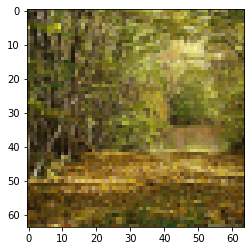

In [10]:
plt.imshow(X_test[100])
plt.show()

#### <b>(알아보기) 데이터셋 시각화 방법</b>

* 학습 데이터셋에 포함된 이미지를 시각화 합니다.
* 각 클래스에 따른 이미지가 정확한지 확인합니다.
   * 예를 들어 빌딩(buildings) 컬럼에 있는 이미지는 전부 빌딩 이미지여야 합니다.

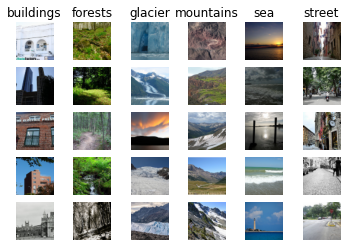

In [10]:
# 데이터셋에서 각 클래스에 따른 일부 데이터를 시각화합니다.
classes = ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 5


# 데이터 시각화 함수 구현
def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(y_train == y) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx])
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_train, classes, samples_per_class)

#### <b>Problem 4. 학습/검증 데이터셋 전처리</b>

* 선형 모델(linear model)을 학습할 예정이므로, 각 이미지를 벡터로 변경합니다.
* 다음과 같이 X_train, y_train, X_test, y_test 변수의 shape이 구성되도록 소스코드를 작성하세요.
    * <b>X_train</b>: (13627, 12288)
    * <b>y_train</b>: (13627,)
    * <b>X_test</b>: (3407, 12288)
    * <b>y_test</b>: (3407,)
* 본 실습에서는 <b>데이터 정규화(normalization)</b>을 수행하지 않습니다.

In [11]:
pixels = 64*64*3

X_train = X_train.reshape((13627,pixels))
X_test = X_test.reshape((3407,pixels))

#### <b>(Hint) 데이터셋 구성 확인하기</b>

* 정상적으로 데이터셋이 구성되었다면, 아래 코드의 실행 결과가 다음과 같아야 합니다.

<pre>
학습 이미지: (13627, 12288)
학습 레이블: (13627,)
검증 이미지: (3407, 12288)
검증 레이블: (3407,)
</pre>

In [12]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_test.shape)
print('검증 레이블:', y_test.shape)

학습 이미지: (13627, 12288)
학습 레이블: (13627,)
검증 이미지: (3407, 12288)
검증 레이블: (3407,)


#### <b>(알아보기) Logistic Regression 라이브러리를 이용한 선형 분류 모델 학습 방법</b>

* sklearn.linear_model에서 제공하는 LogisticRegression을 이용합니다.
    * 참고: [LogisticRegression 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    * 기본적으로 GPU를 지원하지 않기 때문에, 학습 속도가 느릴 수 있습니다.
* LogisticRegression의 주요 파라미터는 다음과 같습니다.
    * <b>penalty</b>: 정규화(normalization) 목적으로 사용할 norm을 명시(default='l2')
    * <b>solver</b>: 최적화(optimization)을 진행할 때 사용할 알고리즘(default='lbfgs') 
    * <b>max_iter</b>: 수렴(convergence)을 위해 반복할 횟수(default=100)
    * <b>multi_class</b>: 클래스(class)의 개수가 여러 개인지 확인(default='auto')
    * <b>verbose</b>: 자세한 학습 결과를 표시(default=0)

* 예를 들어 10번의 반복(iteration)을 수행하여 학습하는 코드는 다음과 같습니다.

<pre>
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10)
model.fit(X_train, y_train)
</pre>

* 너무 적은 횟수로 반복하여 수렴이 되지 않은 경우에는 다음과 같은 경고(warning) 메시지가 출력될 수 있습니다.
    * 이때 max_iter의 값을 증가시킴으로써 경고 메시지가 나오지 않도록 할 수 있습니다.
    * 생각해 보기: 완전히 수렴하도록 만드는 것이 성능 향상에 도움이 될까요?

<pre>
ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
</pre>

In [13]:
from sklearn.linear_model import LogisticRegression
import time

In [13]:

start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10)
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 17.76002597808838


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### <b>(알아보기) 학습된 모델의 정확도 계산 방법</b>

* 학습된 LogisticRegression 모델의 정확도를 평가합니다.
* accuracy_score 메서드를 이용할 수 있습니다.

In [14]:
from sklearn.metrics import accuracy_score

In [14]:
y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.4907169589784986
검증 데이터셋 정확도: 0.49075432932198415
클래스: [0. 1. 2. 3. 4. 5.]
반복 횟수: [10]
학습된 가중치 크기: (6, 12288)


#### <b>(알아보기) 개별 이미지에 대하여 판별 수행</b>

* 몇 개의 이미지에 대하여 판별을 수행한 결과를 출력할 수 있습니다.

<pre>
0. 빌딩(buildings)
1. 숲(forests)
2. 빙하(glacier)
3. 산(mountains)
4. 바다(sea)
5. 거리(street)
</pre>

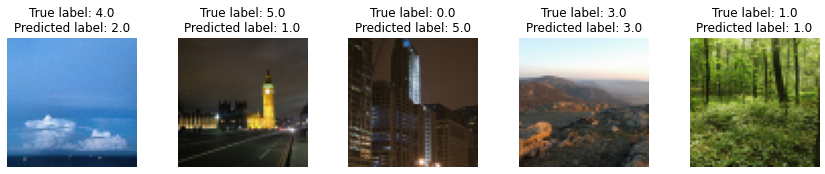

In [15]:
max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_test[:max_cnt], y_test[:max_cnt], model.predict(X_test[:max_cnt])):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 혼동 행렬 시각화하기</b>

* 참고: [Seaborn.heatmap 공식 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 
* 각 클래스에 대하여 정확히 분류하는지 확인하기 위해 혼동 행렬(confusion matrix)을 생성할 수 있습니다.
* 생각해 보기: 어떤 클래스에 대하여 가장 분류 정확도가 떨어지나요? 그 이유는 무엇이라고 생각하나요?

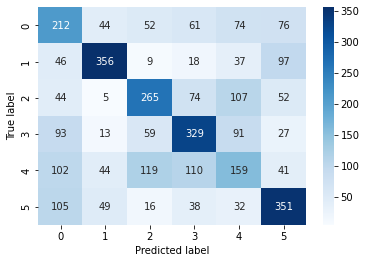

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

#### <b>Problem 6. Logistic Regression 모델의 성능 평가하기</b>

* 다음의 코드를 실행하여 실행 결과를 정리하세요.
    * 실행 결과는 매 번 달라질 수 있습니다.
* 반복 횟수가 10일 때
    * 학습 데이터셋 정확도: {0.4848462610992882}
    * 검증 데이터셋 정확도: {0.49457000293513353}
* 반복 횟수가 30일 때
    * 학습 데이터셋 정확도: {0.5490570191531519}
    * 검증 데이터셋 정확도: {0.5292045788083358}
* 반복 횟수가 50일 때
    * 학습 데이터셋 정확도: {0.5646877522565495}
    * 검증 데이터셋 정확도: {0.5318461990020545}
* 반복 횟수가 100일 때
    * 학습 데이터셋 정확도: {0.6040948117707492}
    * 검증 데이터셋 정확도: {0.5321397123569123}
* 반복 횟수가 200일 때
    * 학습 데이터셋 정확도: {0.6808541865414252}
    * 검증 데이터셋 정확도: {0.49574405635456414}
* 반복 횟수가 300일 때
    * 학습 데이터셋 정확도: {0.7303881998972628}
    * 검증 데이터셋 정확도: {0.47285001467566773}
* 반복 횟수가 많을 수록 검증 성능이 좋아지나요? {아니다.}
    * 그 이유는: {어느 특정 분기점을 넘어가면 과적합이 일어나기때문에 학습 데이터셋 정확도는 상승할지라도 검증 데이터셋의 정확도는 하락하게 된다.}

In [50]:
from sklearn.linear_model import LogisticRegression


for iter in [10, 30, 50, 100, 200, 300]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train, y_train)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=10)]
학습 데이터셋 정확도: 0.4848462610992882
검증 데이터셋 정확도: 0.49457000293513353
소요된 시간(초 단위): 17.830878734588623


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=30)]
학습 데이터셋 정확도: 0.5490570191531519
검증 데이터셋 정확도: 0.5292045788083358
소요된 시간(초 단위): 42.6473343372345


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=50)]
학습 데이터셋 정확도: 0.5646877522565495
검증 데이터셋 정확도: 0.5318461990020545
소요된 시간(초 단위): 71.74703550338745


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=100)]
학습 데이터셋 정확도: 0.6040948117707492
검증 데이터셋 정확도: 0.5321397123569123
소요된 시간(초 단위): 134.37464213371277


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=200)]
학습 데이터셋 정확도: 0.6808541865414252
검증 데이터셋 정확도: 0.49574405635456414
소요된 시간(초 단위): 259.78635454177856


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=300)]
학습 데이터셋 정확도: 0.7303881998972628
검증 데이터셋 정확도: 0.47285001467566773
소요된 시간(초 단위): 380.14676237106323


#### <b>(알아보기) 데이터 증진(Data augmentation): Shift와 Flip</b>

* 데이터 증진 함수를 다음과 같이 구현할 수 있습니다.
    * <b>이동(shift)</b>: 이미지를 이동시킵니다.
    * <b>뒤집기(flip)</b>: 이미지를 상하 혹은 좌우 반전시킵니다.

In [15]:
from scipy.ndimage.interpolation import shift

In [16]:
def shift_image(image, dx, dy):
    image = image.reshape((64, 64, 3))
    # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy, dx, 0])
    return shifted_image.reshape([-1])


def horizontal_flip(image):
    image = image.reshape((64, 64, 3))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=1)
    return flipped_image.reshape([-1])


def vertical_flip(image):
    image = image.reshape((64, 64, 3))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=0)
    return flipped_image.reshape([-1])

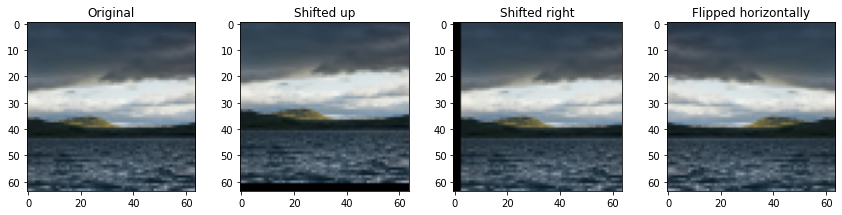

In [19]:
# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(12, 4)
fig.tight_layout()

image = X_train[0]
shifted_image_up = shift_image(image, 0, -3)
shifted_image_right = shift_image(image, 3, 0)
flipped_image = horizontal_flip(image)

# 출력할 때는 이미지 해상도에 맞게 재변형
axes[0].imshow(np.reshape(image, (64, 64, 3)))
axes[0].set_title('Original')
axes[1].imshow(np.reshape(shifted_image_up, (64, 64, 3)))
axes[1].set_title('Shifted up')
axes[2].imshow(np.reshape(shifted_image_right, (64, 64, 3)))
axes[2].set_title('Shifted right')
axes[3].imshow(np.reshape(flipped_image, (64, 64, 3)))
axes[3].set_title('Flipped horizontally')

plt.show()

#### <b>Problem 7. 데이터 전처리를 활용하여 선형 모델의 분류 성능 높이기</b>

* 마찬가지로 LinearRegression을 사용하는 상태에서, 데이터 전처리만 적용하여 성능을 높이는 방법을 찾아 보세요.
    * 데이터 증진(data augmentation)
    * (옵션) 데이터 정규화(normalization)
* LinearRegression에서 학습 횟수(max_iter)와 같은 파라미터는 자유롭게 변경해도 됩니다.
* 검증 정확도(validation accuracy)를 <b>최소 55% 이상</b>으로 만드세요.
* <b>데이터 증진(data augmentation)</b> 적용 예시
    * 단, 아래 방식으로 데이터 증진을 과도하게 적용하는 경우에는 메모리 부족으로 세션이 다운될 수 있습니다.

<pre>
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
cnt = 0
for image, label in zip(X_train, y_train):
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]
</pre>

* <b>(옵션) 데이터 정규화(data normalization)</b>
    * 원하는 경우 데이터 정규화를 적용할 수 있습니다.
    * 참고로 데이터 정규화를 적용하는 경우 검증(validation) 데이터에도 적용해야 합니다.

<pre>
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train_augmented)

X_train_augmented = scaler.transform(X_train_augmented)
X_val = scaler.transform(X_val)
</pre>

In [17]:
import random

In [18]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
cnt = 0
for image, label in zip(X_train, y_train):
    # if cnt < 5000:
    #     dx = random.uniform(1, 3)
    #     dy = random.uniform(1, 3)
    #     X_train_augmented.append(shift_image(image, dx, dy))
    #     y_train_augmented.append(label)
    # elif cnt < 11000:
    #     X_train_augmented.append(horizontal_flip(image))
    #     y_train_augmented.append(label)
    # else:
    #     X_train_augmented.append(vertical_flip(image))
    #     y_train_augmented.append(label)
    # cnt += 1
    X_train_augmented.append(horizontal_flip(image))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [19]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaler.fit(X_train_augmented)

X_train_augmented = scaler.transform(X_train_augmented)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

X_train_scaled = [image for image in X_train] 
y_train_scaled = [label for label in y_train] 
scaler = MinMaxScaler() 
scaler.fit(X_train_scaled) 
X_train_scaled = scaler.transform(X_train_scaled) 
X_test = scaler.transform(X_test)

In [20]:
# iter = 50
for iter in range(65,70,5):
    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train_augmented, y_train_augmented)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train_augmented)
    train_acc = accuracy_score(y_train_augmented, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("====================================================")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=65)]
학습 데이터셋 정확도: 0.5676964849196449
검증 데이터셋 정확도: 0.5453478133255063


#### <b>(Hint) 학습 완료된 모델 확인하기</b>

* 데이터 증진 및 하이퍼 파라미터가 효과적으로 설정되었다면, <b>검증 데이터셋 정확도가 55% 이상</b> 나오는 것이 가능합니다.
    * 검증 정확도를 55% 이상으로 만드세요.

In [ ]:
y_pred = model.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

#### <b>Problem 8. KNN 모델 평가 및 성능 높이기</b>

* 이번에는 KNN 모델을 이용하여 분류(classification)를 진행해 봅시다.
* 아래 소스 코드를 자유롭게 변형하여 <b>검증 정확도(validation accuracy)를 최대한으로 높이는 것이 목표</b>입니다.

1. <b>자신만의 거리 메트릭(metric)을 추가</b>해 보세요. 현재는 L1_distance(), L2_distance()만 존재합니다.
    * <b>(예시)</b> L1과 L2 거리(distance)를 섞은 나만의 거리 메트릭
2. 데이터 증진(data augmentation)을 포함해 다양한 기법을 자유롭게 적용해도 됩니다.
    * <b>(주의)</b> 메모리가 초과되면 세션이 다운될 수 있습니다.
* <b>내가 얻은 최고의 검증 정확도</b>: {0.55}

In [39]:
from collections import Counter

In [40]:
class kNearestNeighbors(object):
    def __init__(self):
        pass

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def L1_distance(self, x):
        distances = np.sum(np.abs(self.X_train - x), axis=1)
        return distances
    
    def L2_distance(self, x):
        distances = np.sqrt(np.sum(np.square(self.X_train - x), axis=1))
        return distances

    def L3_distance(self, x):
        distances = (self.L1_distance(x)+self.L2_distance(x))*(0.5)
        return distances


    def predict(self, X_val, k, distance):
        num_val = X_val.shape[0]
        # y_pred = np.zeros((num_val), dtype=int)
        y_pred = np.empty((num_val), dtype=int)

        for i in range(num_val):
            shortest = []
            # 각 검증 이미지(i번째 이미지)마다 모든 학습 이미지와의 거리 계산
            if distance == 'L1':
                distances = self.L1_distance(X_val[i, :])
            if distance == 'L2':
                distances = self.L2_distance(X_val[i, :])
            if distance == 'L3':
                distances = self.L3_distance(X_val[i, :])
            min_indices = np.argsort(distances) # 가까운 학습 이미지 순으로 정렬
            for j in range(k): # 가장 가까운 k개의 학습 이미지의 인덱스를 확인해 레이블 정보 기록
                shortest.append(self.y_train[min_indices[j]])
            y_pred[i] = Counter(shortest).most_common(1)[0][0] # 가장 많이 등장한 레이블(label) 계산
        return y_pred

In [ ]:
start_time = time.time() # 시작 시간

knn = kNearestNeighbors()
knn.train(X_train, y_train)

# KNN 클래스(class) 코드를 적절히 수정한 뒤에 k 및 distance 값을 조절하여 검증 정확도를 최대한 높여 보세요.
y_pred = knn.predict(X_test, k=7, distance='L2')
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_test[:max_cnt], y_test[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 하이퍼 파라미터 찾기</b>

* distance와 k의 값을 적절히 조절하여 <b>가장 성능이 우수한 파라미터를 찾을 필요</b>가 있습니다.
* 전체 검증 데이터는 3,000개 이상이므로 많은 시간이 소요될 수 있습니다.
    * 따라서 하이퍼 파라미터를 찾을 때는 200개의(일부의) 평가 데이터만 이용하는 것을 추천합니다.
    * 아래 코드는 k=7, 거리(distance) 메트릭으로는 L2를 사용한 코드 예시입니다.

In [32]:
knn = kNearestNeighbors()
knn.train(X_train, y_train)

for k in range(3,10):
    start_time = time.time() # 시작 시간

    number = 200
    X_val_small = X_test[:number]
    y_val_small = y_test[:number]

    y_pred = knn.predict(X_val_small, k, distance='L2')
    val_acc = accuracy_score(y_val_small, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")


검증 데이터셋 정확도: 0.485
소요된 시간(초 단위): 170.27064681053162
검증 데이터셋 정확도: 0.51
소요된 시간(초 단위): 170.124840259552
검증 데이터셋 정확도: 0.51
소요된 시간(초 단위): 170.55533647537231
검증 데이터셋 정확도: 0.51
소요된 시간(초 단위): 171.5953667163849
검증 데이터셋 정확도: 0.49
소요된 시간(초 단위): 174.74520325660706
검증 데이터셋 정확도: 0.48
소요된 시간(초 단위): 171.0003776550293
검증 데이터셋 정확도: 0.515
소요된 시간(초 단위): 181.29109239578247


In [37]:
knn = kNearestNeighbors()
knn.train(X_train, y_train)

for k in [4,5,6,9]:
    start_time = time.time() # 시작 시간

    number = 200
    X_val_small = X_test[:number]
    y_val_small = y_test[:number]

    y_pred = knn.predict(X_val_small, k, distance='L1')
    val_acc = accuracy_score(y_val_small, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

검증 데이터셋 정확도: 0.52
소요된 시간(초 단위): 170.8367338180542
검증 데이터셋 정확도: 0.515
소요된 시간(초 단위): 172.2682740688324
검증 데이터셋 정확도: 0.545
소요된 시간(초 단위): 176.00262212753296
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 169.557541847229


In [41]:
knn = kNearestNeighbors()
knn.train(X_train, y_train)

for k in [4,5,6,9]:
    start_time = time.time() # 시작 시간

    number = 200
    X_val_small = X_test[:number]
    y_val_small = y_test[:number]

    y_pred = knn.predict(X_val_small, k, distance='L3')
    val_acc = accuracy_score(y_val_small, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

검증 데이터셋 정확도: 0.52
소요된 시간(초 단위): 337.6108646392822
검증 데이터셋 정확도: 0.515
소요된 시간(초 단위): 337.10389590263367
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 331.8625457286835
검증 데이터셋 정확도: 0.545
소요된 시간(초 단위): 324.8871695995331


In [43]:
knn = kNearestNeighbors()
knn.train(X_train, y_train)

for k in range(6,31):
    start_time = time.time() # 시작 시간

    number = 200
    X_val_small = X_test[:number]
    y_val_small = y_test[:number]

    y_pred = knn.predict(X_val_small, k, distance='L1')
    val_acc = accuracy_score(y_val_small, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

검증 데이터셋 정확도: 0.545
소요된 시간(초 단위): 161.3791491985321
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 160.47266578674316
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 160.0727822780609
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 160.3319911956787
검증 데이터셋 정확도: 0.535
소요된 시간(초 단위): 162.046639919281
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 158.92628502845764
검증 데이터셋 정확도: 0.535
소요된 시간(초 단위): 158.24304914474487
검증 데이터셋 정확도: 0.53
소요된 시간(초 단위): 158.84709906578064
검증 데이터셋 정확도: 0.545
소요된 시간(초 단위): 159.1470832824707
검증 데이터셋 정확도: 0.525
소요된 시간(초 단위): 156.9122178554535
검증 데이터셋 정확도: 0.525
소요된 시간(초 단위): 157.27564549446106
검증 데이터셋 정확도: 0.535
소요된 시간(초 단위): 156.24509644508362
검증 데이터셋 정확도: 0.545
소요된 시간(초 단위): 156.58570885658264
검증 데이터셋 정확도: 0.55
소요된 시간(초 단위): 156.4047088623047
검증 데이터셋 정확도: 0.535
소요된 시간(초 단위): 156.52721858024597
검증 데이터셋 정확도: 0.535
소요된 시간(초 단위): 157.726167678833
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 168.44478511810303
검증 데이터셋 정확도: 0.535
소요된 시간(초 단위): 177.3928406238556
검증 데이터셋 정확도: 0.53
소요된 시간(초 단위): 175.5951497554779
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 

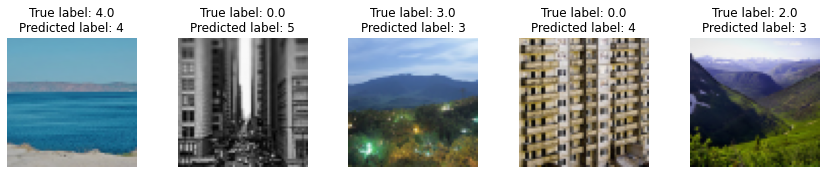

In [42]:
max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val_small[:max_cnt], y_val_small[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 커스텀 데이터셋 찾기</b>

* 다양한 웹 사이트에서 데이터셋을 다운로드할 수 있습니다.
    * Roboflow 공공(public) 데이터셋: https://public.roboflow.com/classification
    * 캐글(Kaggle) 데이터셋: https://www.kaggle.com/datasets

* 다음과 같이 사이트에 방문하여 데이터셋을 둘러볼 수 있습니다.
* Roboflow에서는 Jupyter Notebook에서 바로 적용 가능한 데이터셋 다운로드 코드를 제공합니다.

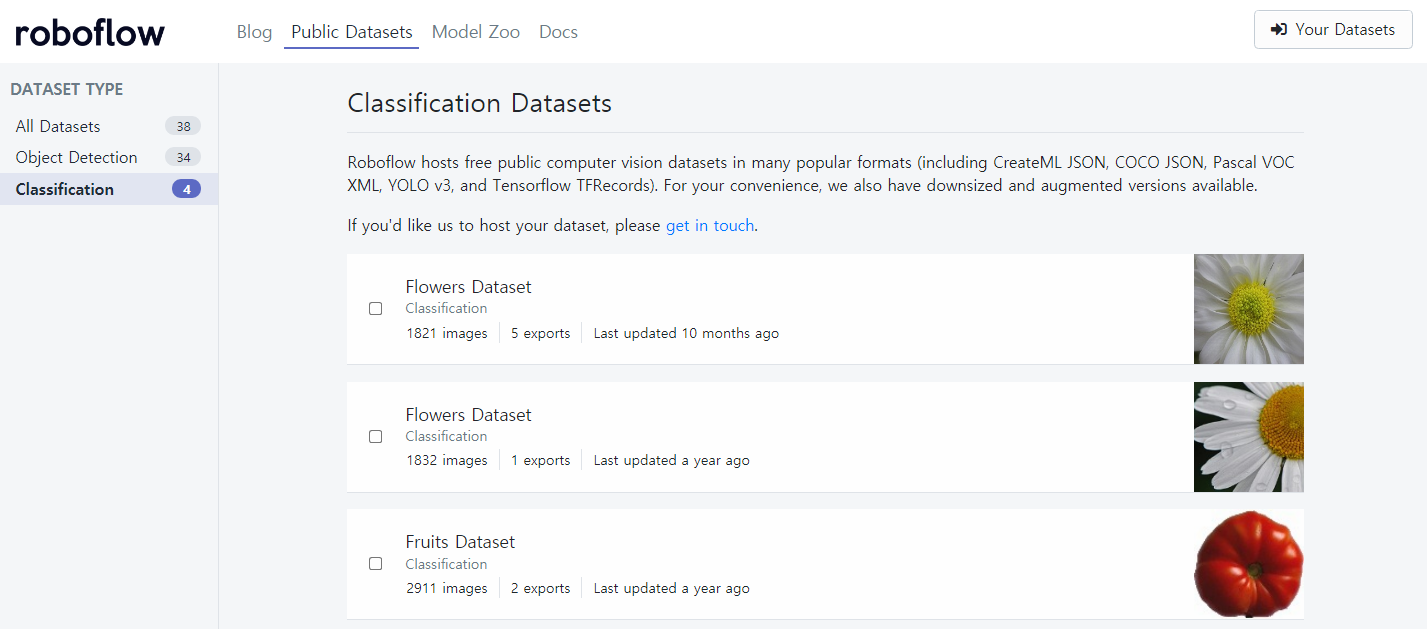

#### <b>Problem 9. 커스텀 데이터셋 분류해 보기</b>

* 자신만의 커스텀 데이터셋을 준비하여 분류(classification) 모델을 학습해 봅시다.
* 아래쪽 코드는 완전히 자유롭게 작성하시면 됩니다.

In [44]:
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/0general/satellite_image_classification
# 폴더 안으로 이동
%cd satellite_image_classification

Cloning into 'satellite_image_classification'...
remote: Enumerating objects: 5599, done.
remote: Counting objects: 100% (5599/5599), done.
remote: Compressing objects: 100% (5598/5598), done.
remote: Total 5599 (delta 0), reused 5599 (delta 0), pack-reused 0
Receiving objects: 100% (5599/5599), 20.88 MiB | 28.62 MiB/s, done.
/content/Scene-Classification-Dataset/satellite_image_classification


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [47]:
path = 'data/'

# 전체 이미지 개수 출력하기
# cloudy_list = os.listdir(path + 'cloudy/')
# desert_list = os.listdir(path + 'desert/')
# green_list = os.listdir(path + 'green_area/')
# water_list = os.listdir(path + 'water/')

file_list_0 = os.listdir(path + 'cloudy/')
file_list_1 = os.listdir(path + 'desert/')
file_list_2 = os.listdir(path + 'green_area/')
file_list_3 = os.listdir(path + 'water/')


# # 학습 이미지 확인하기
# dataset = pd.read_csv(path + 'train.csv')
# print('학습 이미지의 개수:', len(dataset))
# print('학습 이미지별 클래스 정보')
# dataset.head()

이미지 분류

In [48]:
data= [] 
for i in range(len(file_list_0)): 
    data.append([file_list_0[i],0]) 

for i in range(len(file_list_1)): 
    data.append([file_list_1[i],1]) 

for i in range(len(file_list_2)): 
    data.append([file_list_2[i],2]) 
    
for i in range(len(file_list_3)): 
    data.append([file_list_3[i],3]) 
    
sadata = pd.DataFrame(data, columns = ['image_name','label'])

In [49]:

train_dataset, val_dataset = train_test_split(sadata, test_size=0.2)

print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(val_dataset))

학습 데이터셋 크기: 4504
검증 데이터셋 크기: 1127


In [50]:
X_train = np.empty(shape = (4504,64,64,3))
y_train = np.empty(shape = (4504,))
X_test = np.empty(shape = (1127,64,64,3))
y_test = np.empty(shape = (1127,))

classes = ['cloudy/', 'desert/', 'green_area/', 'water/']

index = 0
for i, row in train_dataset.iterrows():
  a = classes[row['label']]
  img = Image.open(path+a+row['image_name'])
  img = np.asarray(img)
  img = resize(img, (64,64,3))
  X_train[index] = img
  y_train[index] = row['label']
  index += 1

index = 0
for i, row in val_dataset.iterrows():
  a = classes[row['label']]
  img = Image.open(path+a+row['image_name'])
  img = np.asarray(img)
  img = resize(img, (64,64,3))
  X_test[index] = img
  y_test[index] = row['label']
  index += 1

In [51]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_test.shape)
print('검증 레이블:', y_test.shape)

학습 이미지: (4504, 64, 64, 3)
학습 레이블: (4504,)
검증 이미지: (1127, 64, 64, 3)
검증 레이블: (1127,)


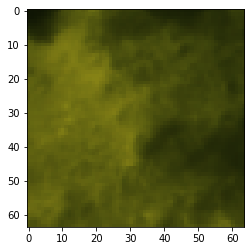

In [52]:
plt.imshow(X_test[100])
plt.show()

In [54]:
pixels = 64*64*3

X_train = X_train.reshape((-1,pixels))
X_test = X_test.reshape((-1,pixels))

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_test.shape)
print('검증 레이블:', y_test.shape)

학습 이미지: (4504, 12288)
학습 레이블: (4504,)
검증 이미지: (1127, 12288)
검증 레이블: (1127,)


In [55]:
from sklearn.linear_model import LogisticRegression
import time

In [56]:
start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10)
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 5.454412937164307


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [57]:
from sklearn.metrics import accuracy_score

In [58]:
y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.7548845470692718
검증 데이터셋 정확도: 0.7684117125110914
클래스: [0. 1. 2. 3.]
반복 횟수: [10]
학습된 가중치 크기: (4, 12288)


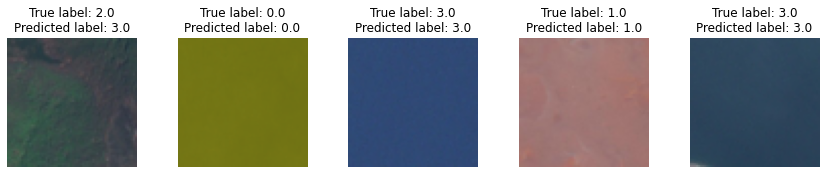

In [59]:
max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_test[:max_cnt], y_test[:max_cnt], model.predict(X_test[:max_cnt])):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns     

# cm = confusion_matrix(y_test, y_pred)
# df_cm = pd.DataFrame(cm)
# df_cm.index.name = 'True label'
# df_cm.columns.name = 'Predicted label'

# # Seaborn heatmeap을 이용하여 화면에 출력하기
# sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
# plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression


for iter in range(5,100,5):
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train, y_train)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=5)]
학습 데이터셋 정확도: 0.7282415630550622
검증 데이터셋 정확도: 0.7497781721384206
소요된 시간(초 단위): 4.007786989212036


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=10)]
학습 데이터셋 정확도: 0.7548845470692718
검증 데이터셋 정확도: 0.7684117125110914
소요된 시간(초 단위): 5.60695481300354


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=15)]
학습 데이터셋 정확도: 0.8257104795737122
검증 데이터셋 정확도: 0.8243123336291038
소요된 시간(초 단위): 7.543620586395264


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=20)]
학습 데이터셋 정확도: 0.8288188277087034
검증 데이터셋 정확도: 0.8260869565217391
소요된 시간(초 단위): 9.51209568977356


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=25)]
학습 데이터셋 정확도: 0.8421403197158082
검증 데이터셋 정확도: 0.8358473824312334
소요된 시간(초 단위): 12.83742618560791


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=30)]
학습 데이터셋 정확도: 0.8428063943161634
검증 데이터셋 정확도: 0.84472049689441
소요된 시간(초 단위): 16.731262683868408


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=35)]
학습 데이터셋 정확도: 0.8565719360568383
검증 데이터셋 정확도: 0.8544809228039042
소요된 시간(초 단위): 17.128262758255005


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=40)]
학습 데이터셋 정확도: 0.8661190053285968
검증 데이터셋 정확도: 0.8544809228039042
소요된 시간(초 단위): 20.042192697525024


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=45)]
학습 데이터셋 정확도: 0.8754440497335702
검증 데이터셋 정확도: 0.867790594498669
소요된 시간(초 단위): 21.94624423980713


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=50)]
학습 데이터셋 정확도: 0.8903197158081705
검증 데이터셋 정확도: 0.8757763975155279
소요된 시간(초 단위): 24.134403467178345


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=55)]
학습 데이터셋 정확도: 0.8907637655417406
검증 데이터셋 정확도: 0.8695652173913043
소요된 시간(초 단위): 26.821240186691284


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=60)]
학습 데이터셋 정확도: 0.8947602131438721
검증 데이터셋 정확도: 0.8731144631765749
소요된 시간(초 단위): 29.31080198287964


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=65)]
학습 데이터셋 정확도: 0.8963143872113677
검증 데이터셋 정확도: 0.8775510204081632
소요된 시간(초 단위): 31.16573143005371


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=70)]
학습 데이터셋 정확도: 0.9005328596802842
검증 데이터셋 정확도: 0.8855368234250222
소요된 시간(초 단위): 37.05758833885193


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=75)]
학습 데이터셋 정확도: 0.894316163410302
검증 데이터셋 정확도: 0.8748890860692103
소요된 시간(초 단위): 39.484248638153076


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=80)]
학습 데이터셋 정확도: 0.8967584369449378
검증 데이터셋 정확도: 0.8722271517302573
소요된 시간(초 단위): 42.47546410560608


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=85)]
학습 데이터셋 정확도: 0.900088809946714
검증 데이터셋 정확도: 0.8713398402839396
소요된 시간(초 단위): 55.82755208015442


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=90)]
학습 데이터셋 정확도: 0.8976465364120781
검증 데이터셋 정확도: 0.867790594498669
소요된 시간(초 단위): 56.52243161201477


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[학습 완료(max_iter=95)]
학습 데이터셋 정확도: 0.9018650088809946
검증 데이터셋 정확도: 0.8731144631765749
소요된 시간(초 단위): 50.22028684616089


In [ ]:
# from scipy.ndimage.interpolation import shift

# def shift_image(image, dx, dy):
#     image = image.reshape((64, 64, 3))
#     # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
#     shifted_image = shift(image, [dy, dx, 0])
#     return shifted_image.reshape([-1])


# def horizontal_flip(image):
#     image = image.reshape((64, 64, 3))
#     # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
#     flipped_image = np.flip(image, axis=1)
#     return flipped_image.reshape([-1])


# def vertical_flip(image):
#     image = image.reshape((64, 64, 3))
#     # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
#     flipped_image = np.flip(image, axis=0)
#     return flipped_image.reshape([-1])

In [ ]:
# import random

# X_train_augmented = [image for image in X_train]
# y_train_augmented = [label for label in y_train]

# # 이미지를 하나씩 확인하며 변형된 이미지 추가
# cnt = 0
# for image, label in zip(X_train, y_train):
#     # if cnt < 5000:
#     #     dx = random.uniform(1, 3)
#     #     dy = random.uniform(1, 3)
#     #     X_train_augmented.append(shift_image(image, dx, dy))
#     #     y_train_augmented.append(label)
#     # elif cnt < 11000:
#     #     X_train_augmented.append(horizontal_flip(image))
#     #     y_train_augmented.append(label)
#     # else:
#     #     X_train_augmented.append(vertical_flip(image))
#     #     y_train_augmented.append(label)
#     # cnt += 1
#     X_train_augmented.append(horizontal_flip(image))
#     y_train_augmented.append(label)

# X_train_augmented = np.array(X_train_augmented)
# y_train_augmented = np.array(y_train_augmented)

# # 증진된 데이터들을 섞기(shuffle)
# shuffle_idx = np.random.permutation(len(X_train_augmented))
# X_train_augmented = X_train_augmented[shuffle_idx]
# y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train_augmented)

# X_train_augmented = scaler.transform(X_train_augmented)
# X_test = scaler.transform(X_test)

In [ ]:
# # iter = 50
# for iter in range(65,70,5):
#     model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
#     model.fit(X_train_augmented, y_train_augmented)

#     print("====================================================")
#     print(f'[학습 완료(max_iter={iter})]')

#     y_pred = model.predict(X_train_augmented)
#     train_acc = accuracy_score(y_train_augmented, y_pred)
#     print('학습 데이터셋 정확도:', train_acc)

#     y_pred = model.predict(X_test)
#     val_acc = accuracy_score(y_test, y_pred)
#     print('검증 데이터셋 정확도:', val_acc)

#     print("====================================================")

In [ ]:
# y_pred = model.predict(X_train_augmented)
# train_acc = accuracy_score(y_train_augmented, y_pred)
# print('학습 데이터셋 정확도:', train_acc)

# y_pred = model.predict(X_test)
# val_acc = accuracy_score(y_test, y_pred)
# print('검증 데이터셋 정확도:', val_acc)

# print('클래스:', model.classes_)
# print('반복 횟수:', model.n_iter_)
# print('학습된 가중치 크기:', model.coef_.shape)